# Lending club case group study

#### Group Members
- Prince Grover
- Vasanth Kumar

### Business Understanding 

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


### Types of decisions

When a person applies for a loan, there are two types of decisions that could be taken by the company:

###### Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

###### Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

###  Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

#### Loading Data

In [4]:
loan = pd.read_csv('loan.csv',low_memory=False,encoding = "ISO-8859-1")
pd.set_option('display.max_columns', loan.shape[1]+1)
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [5]:
# checking dimesion
loan.shape

(39717, 111)

### Cleaning and handling missing values

Checking NaN values count in percentage

In [6]:
null_values = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_values

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

It seems there are lots of columns has 100% Nan values

In [7]:
#Finding columns count which are 100% null values
len(loan.columns[((loan.isnull().sum())/len(loan)) == 1])

54

In [8]:
#Removing columns which are 100% Nan
loan = loan[loan.columns[((loan.isnull().sum())/len(loan)) < 1]]
len(loan.columns)

57

Checking again NaN values count in percentage

In [9]:
null_values = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_values.loc[null_values > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
mths_since_last_record       92.99
revol_util                    0.13
last_pymnt_d                  0.18
next_pymnt_d                 97.13
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [10]:
#Few columns are have more than 50% Nan values, so drop ing them.
#'mths_since_last_delinq','mths_since_last_record','next_pymnt_d' 
loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)
len(loan.columns)

54

Finding any columns unique values less than 3

In [11]:
c = []
for i in loan.columns:
    if loan[i].value_counts().count() < 3:
        print(i ,':', loan[i].unique())
        c.append(i)

term : [' 36 months' ' 60 months']
pymnt_plan : ['n']
initial_list_status : ['f']
collections_12_mths_ex_med : [ 0. nan]
policy_code : [1]
application_type : ['INDIVIDUAL']
acc_now_delinq : [0]
chargeoff_within_12_mths : [ 0. nan]
delinq_amnt : [0]
tax_liens : [ 0. nan]


In [12]:
c

['term',
 'pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

Except 'term', rest of the values seems not useful, so droping all the columns

In [13]:
loan.drop(c[1:],axis=1,inplace=True)
len(loan.columns)

45

In [14]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Below columns are not rquired for analysis, So droping them all.

'desc','title','url','emp_title','initial_list_status','member_id','tax_liens'

In [15]:
loan.drop(['desc','title','url','emp_title','member_id'],axis=1,inplace=True)

In [16]:
null_values = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_values.loc[null_values > 0]

emp_length             2.71
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

emp_length, pub_rec_bankruptcies columns are having 1 - 2 % nan value, so Imputing may create bais.

So Removing those rows.

In [17]:
loan = loan.loc[loan['emp_length'].notnull() & 
        loan['pub_rec_bankruptcies'].notnull()]

### Impute NA Values
revol_util, last_pymnt_d, last_credit_pull_d columns are having less than 1% nan value, so we will impute

In [18]:
print(loan['revol_util'].mode())
print(loan['last_pymnt_d'].mode())
print(loan['last_credit_pull_d'].mode())

loan['revol_util'].fillna(loan['revol_util'].mode()[0], inplace=True)
loan['last_pymnt_d'].fillna(loan['last_pymnt_d'].mode()[0], inplace=True)
loan['last_credit_pull_d'].fillna(loan['last_credit_pull_d'].mode()[0], inplace=True)

0    0%
dtype: object
0    May-16
dtype: object
0    May-16
dtype: object


In [19]:
null_values = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_values.loc[null_values > 0]

Series([], dtype: float64)

We have cleaned and handled all the missing values.

### Data formating

In [20]:
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

There are few columns data format types are not proper. So we will make it proper.

In [21]:
loan['term'] = loan['term'].apply(lambda x: int(x.split()[0]))
loan = loan.rename(columns={'term':'term_months'})

loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')

loan['emp_length'] = loan['emp_length'].str.strip('+ years')
loan['emp_length'] = loan['emp_length'].str.strip('< ')
loan['emp_length'] = loan['emp_length'].astype('int')

loan['zip_code'] = loan['zip_code'].str.strip('xx').astype('str')

loan.dtypes

id                                  int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term_months                         int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                           

#### Creating derived columns

In [22]:
loan['issue_d_month'] = loan['issue_d'].apply(lambda x: x.month)
loan['issue_d_year'] = loan['issue_d'].apply(lambda x: x.year)

In [23]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,12,2011
1,1077430,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,12,2011
2,1077175,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,12,2011
3,1076863,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,12,2011
4,1075358,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,972,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00,12,2011


loan_status is our target column. Current status seems not usefull for our anlysis. So droping those entries.

In [24]:
loan = loan[loan['loan_status']!='Current']

In [25]:
len(loan.columns)

42

Jus zip code seems not useful, we create derived column from that with addr_state.

and droping zip_code column

In [26]:

loan['state_zip_code'] = loan['addr_state']+loan['zip_code']
loan.drop(['zip_code'],axis=1,inplace=True)

In [27]:
#reseting index
loan.reset_index(inplace=True, drop=True)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,state_zip_code
0,1077501,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,12,2011,AZ860
1,1077430,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,12,2011,GA309
2,1077175,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,12,2011,IL606
3,1076863,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,12,2011,CA917
4,1075269,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,12,2011,AZ852


#### More than 60% of the columns are useless, So we have cleaned and formated them properly. Now Data is ready for analysis.

## Data Analysis

### Univariate Anlysis

#### Loan status is our target variable

In [28]:
#Taking a copy of cleaned data
loandata_cleaned = loan[:]

#### Frequency of Loan status

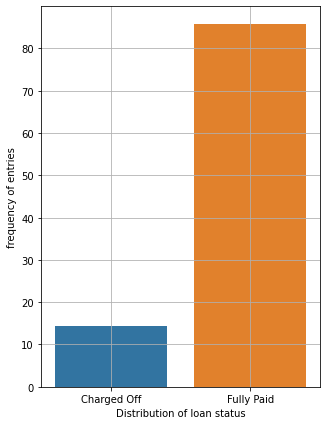

,loan_status,count
0,Charged Off,14.33
1,Fully Paid,85.67


In [29]:
loan_status_table = round(loandata_cleaned.pivot_table(values='id',
                                            index='loan_status',
                                            aggfunc='count')/len(loandata_cleaned.index)*100,2)

loan_status_table.reset_index(level=0,inplace=True)
loan_status_table.rename(columns={'id':'count'},inplace =True)

plt.figure(figsize=(5,7))
ax = sns.barplot(y='count', x='loan_status', data=loan_status_table)
plt.xlabel('Distribution of loan status')
plt.ylabel('frequency of entries')
ax.grid(True)
plt.show()

loan_status_table

#### Observation:

- Charged off frequency is 14-15%
- Fully paid frequncy is 85%


### Loan issued year vs Loan status Analysis

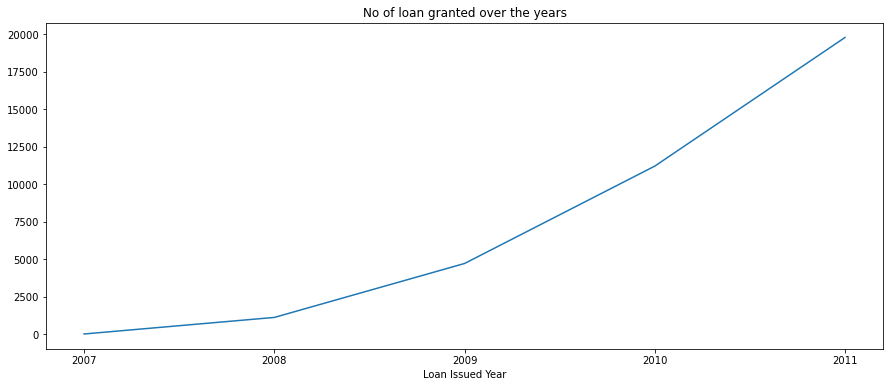

In [30]:


g = loandata_cleaned.groupby('issue_d_year')['loan_status'].count()
plt.figure(figsize=(15,6))
g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issued Year')
plt.show()

#### Observation:

- From 2007 to 2011 number loan ganted has inceased.

#### Distribution of Loan Amount

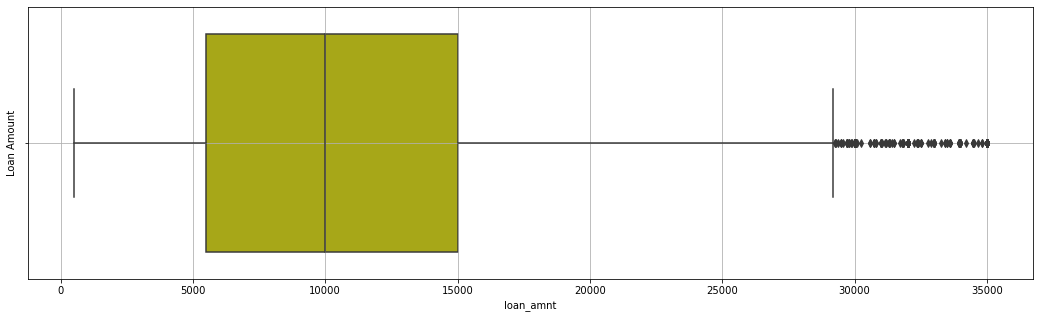

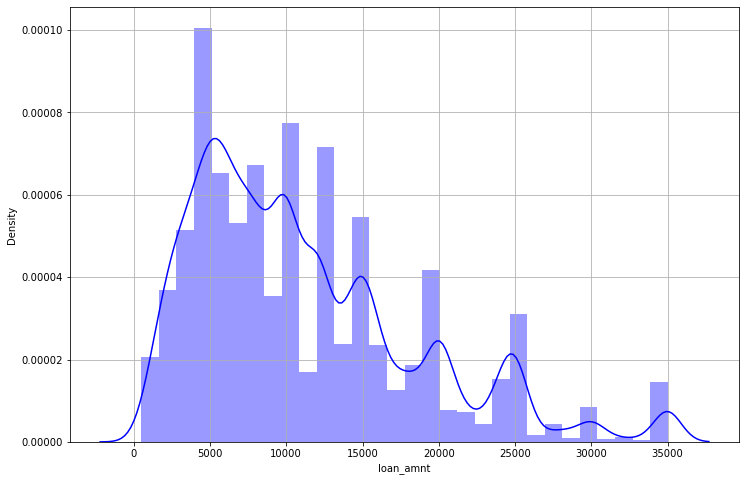

In [31]:
plt.figure(figsize=(18,5))
sns.boxplot( x=loandata_cleaned["loan_amnt"] ,color='y').grid(True)
plt.ylabel('Loan Amount')
plt.show()

plt.figure(figsize=(12,8))
sns.distplot(loandata_cleaned['loan_amnt'], bins=30, color="b").grid(True)
plt.show()



#### Distribution of Interest rate

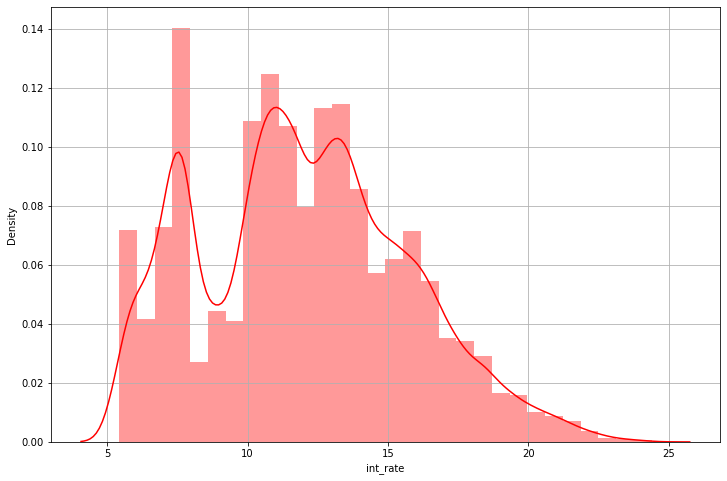

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(loandata_cleaned['int_rate'], bins=30, color="r").grid(True)
plt.show()

#### Distribution of Annual Income

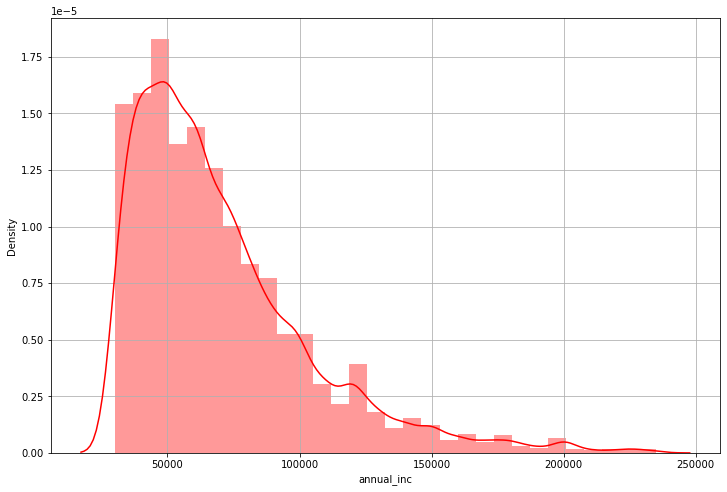

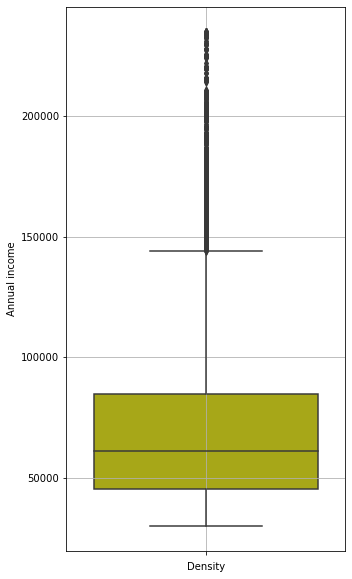

In [33]:
#Removed Outlier
temp_df = loandata_cleaned[(loandata_cleaned['annual_inc']).between(loandata_cleaned['annual_inc'].quantile(0.1),
                                                            loandata_cleaned['annual_inc'].quantile(.99))]

plt.figure(figsize=(12,8))
sns.distplot(temp_df['annual_inc'], bins=30, color="r").grid(True)
plt.show()

plt.figure(figsize=(5,10))
sns.boxplot(y=temp_df["annual_inc"] ,color='y').grid(True)
plt.ylabel('Annual income')
plt.xlabel('Density')
plt.show()

### Bivariate Analysis

In [34]:
loandata_cleaned[['funded_amnt_inv','loan_amnt','funded_amnt','total_pymnt']].describe()

,funded_amnt_inv,loan_amnt,funded_amnt,total_pymnt
count,"36,847.00","36,847.00","36,847.00","36,847.00"
mean,"10,430.40","11,141.33","10,872.92","11,991.06"
std,"7,008.92","7,369.99","7,109.33","8,854.07"
min,0.00,500.00,500.00,0.00
25%,"5,000.00","5,500.00","5,400.00","5,569.11"
50%,"9,000.00","10,000.00","9,600.00","9,810.74"
75%,"14,335.04","15,000.00","15,000.00","16,293.86"
max,"35,000.00","35,000.00","35,000.00","58,563.68"


### Analysing Loss rate 

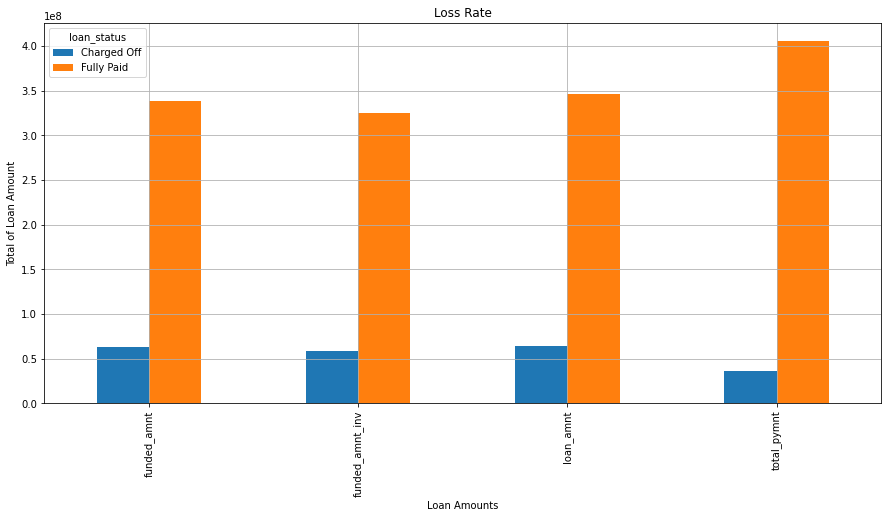

loan_status,Charged Off,Fully Paid
funded_amnt,"62,703,575.00","337,931,075.00"
funded_amnt_inv,"58,998,051.54","325,330,928.81"
loan_amnt,"64,620,150.00","345,904,350.00"
total_pymnt,"36,481,325.58","405,353,419.22"


In [35]:
amount_table = loandata_cleaned.pivot_table(values = ['loan_amnt','funded_amnt',
                                                      'funded_amnt_inv','total_pymnt'],
                                            columns='loan_status',aggfunc='sum')

ax = amount_table.plot.bar(figsize=(15, 7),logy=False).grid(True)
plt.title("Loss Rate")
plt.xlabel('Loan Amounts')
plt.ylabel('Total of Loan Amount')
plt.show()

amount_table

In [36]:
print('Total charged off rate: ',round(round(amount_table['Charged Off']['total_pymnt'],
                     2)/(loandata_cleaned['loan_amnt'].sum())*100,2))

Total charged off rate:  8.89


#### Observation:

- Lending Clubs has got 8-9% loss from defaulter

### Checking correlation with loan status

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,state_zip_code
0,1077501,5000,5000,"4,975.00",36,10.65,162.87,1,6,10,3,"24,000.00",2,2011-12-01,1,1,3,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,12,2011,52
1,1077430,2500,2500,"2,500.00",60,15.27,59.83,2,13,1,3,"30,000.00",1,2011-12-01,0,0,10,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,12,2011,186
2,1077175,2400,2400,"2,400.00",36,15.96,84.33,2,14,10,3,"12,252.00",0,2011-12-01,1,11,14,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,12,2011,218
3,1076863,10000,10000,"10,000.00",36,13.49,339.31,2,10,10,3,"49,200.00",1,2011-12-01,1,9,4,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,12,2011,74
4,1075269,5000,5000,"5,000.00",36,7.90,156.46,0,3,3,3,"36,000.00",1,2011-12-01,1,13,3,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,12,2011,46


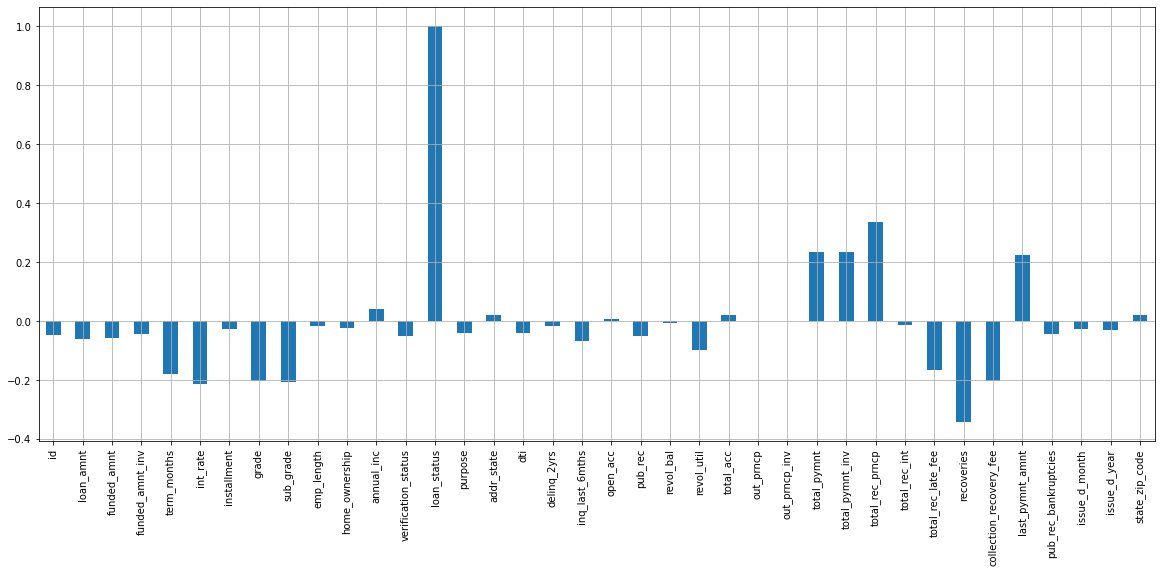

In [37]:
df_1 = loandata_cleaned[:]

cat_data = loandata_cleaned.select_dtypes(include = [np.object])
df_1[cat_data.columns] = df_1[cat_data.columns].apply(lambda x: x.astype('category'))
df_1[cat_data.columns] = df_1[cat_data.columns].apply(lambda x: x.cat.codes)
plt.figure(figsize=(20,8))
df_1.corrwith(df_1['loan_status']).plot.bar().grid(True)
df_1.head()

#### Observation:

- There are approx 10 columns/ variables which are positively correalted to Loan Status and remaining are negatively correlated

### Purpose vs Loan status analysis

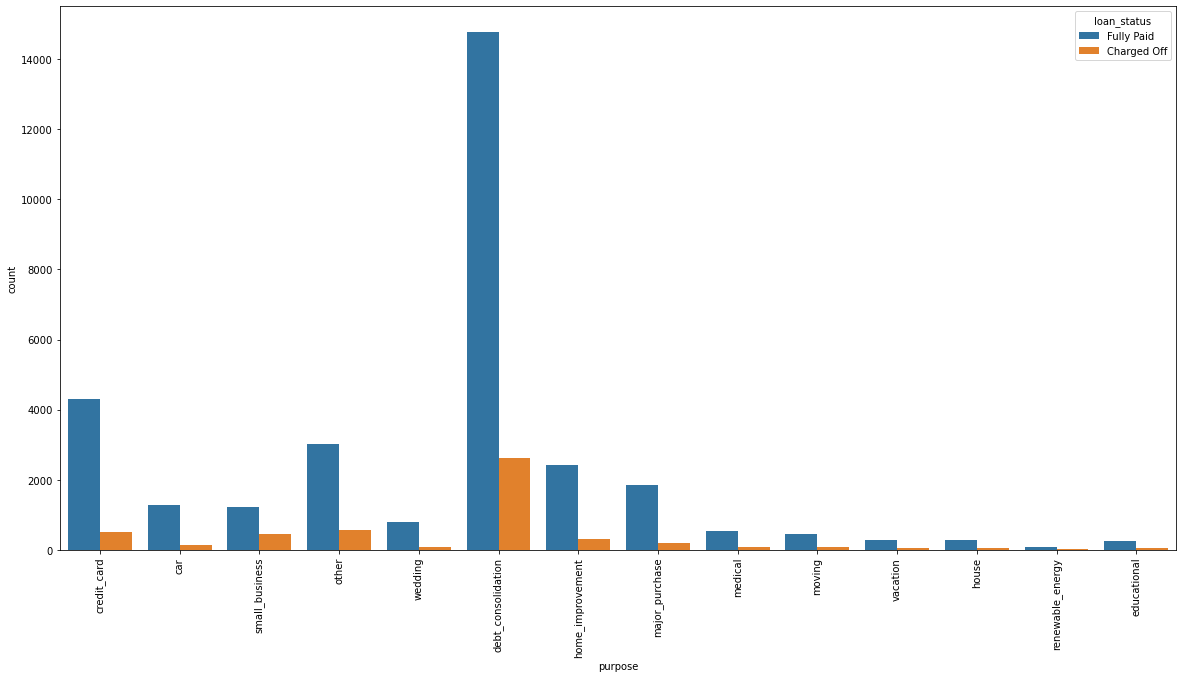

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose', hue="loan_status", data=loandata_cleaned,)
plt.xticks(rotation=90)
plt.show()

#### Observation:

- Majority of loan has been given for the debt consolidation purpose and has been fully paid.

### Loan term vs Charged off Analysis

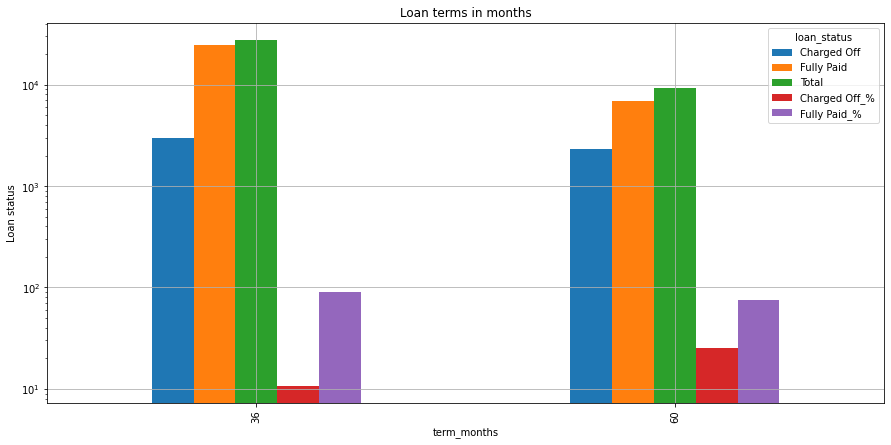

loan_status,Charged Off,Fully Paid,Total,Charged Off_%,Fully Paid_%
term_months,,,,,
36,2955,24635,27590,10.71,89.29
60,2326,6931,9257,25.13,74.87


In [39]:


term_table = loandata_cleaned.pivot_table(values='id',index ='term_months',columns='loan_status', aggfunc='count')
term_table.reset_index(level=0,inplace=True)
term_table['Total'] = term_table['Charged Off'] + term_table['Fully Paid'] 
term_table['Charged Off_%'] = round(term_table['Charged Off']/term_table['Total']*100,2)
term_table['Fully Paid_%'] = round(term_table['Fully Paid']/term_table['Total']*100,2)
term_table.set_index('term_months',inplace=True)

ax = term_table.plot.bar(figsize=(15, 7),logy=True).grid(True)
plt.ylabel('Loan status')
plt.title("Loan terms in months")
plt.show()
term_table


#### Observation:

- Number of 36 terms loan are more than 60 terms loan
- Default rate is more in 60 terms loan than 36 terms

### Grade vs Charged off Analysis

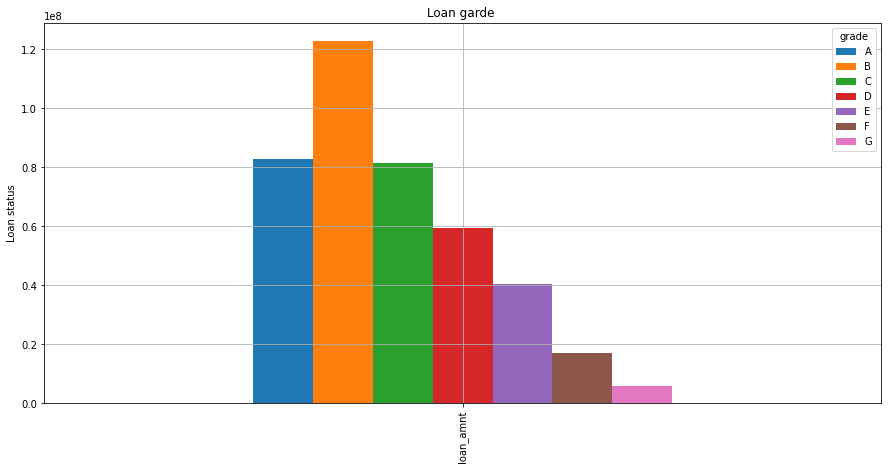

grade,A,B,C,D,E,F,G
loan_amnt,83009475,122866050,81677600,59377575,40508375,17093400,5992025


In [40]:

grade_table = loandata_cleaned.pivot_table(values='loan_amnt',columns='grade', aggfunc='sum')

ax = grade_table.plot.bar(figsize=(15, 7),logy=False).grid(True)
plt.ylabel('Loan status')
plt.title("Loan garde ")
plt.show()

grade_table

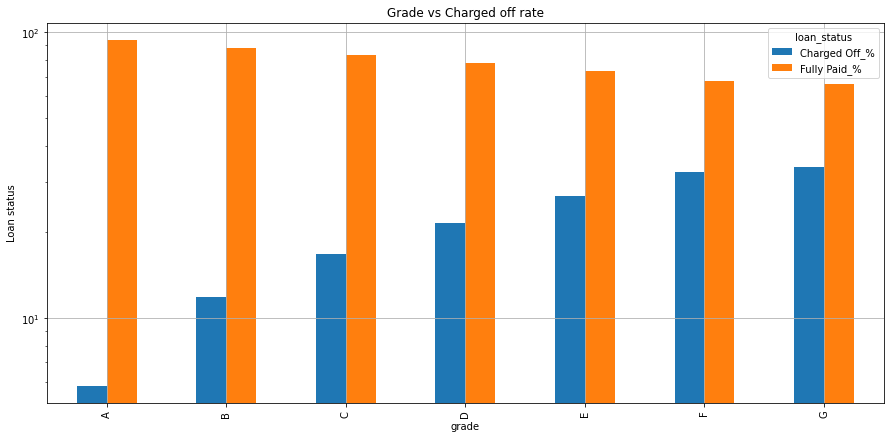

loan_status,Charged Off_%,Fully Paid_%
grade,,
A,5.80,94.20
B,11.89,88.11
C,16.75,83.25
D,21.61,78.39
E,26.69,73.31
F,32.52,67.48
G,33.78,66.22


In [41]:
grade_table2 = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='grade',
                                            columns='loan_status', 
                                            aggfunc='count')
grade_table2.reset_index(level=0,inplace=True)
grade_table2.set_index('grade',inplace=True)
grade_table2['Total'] = grade_table2['Charged Off'] + grade_table2['Fully Paid'] 

grade_table2['Charged Off_%'] = round(grade_table2['Charged Off']/grade_table2['Total']*100,2)
grade_table2['Fully Paid_%'] = round(grade_table2['Fully Paid']/grade_table2['Total']*100,2)

grade_table2.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)

ax = grade_table2.plot.bar(figsize=(15, 7),logy=True).grid(True)
plt.ylabel('Loan status')
plt.title("Grade vs Charged off rate")
plt.show()

grade_table2

#### Observation:

- A,B,C and D are top graded loan
- Default rate is increasing in E,F And G grade respectively
- If LC stop providing E,F,G grade loans would reduce the credit loss.

### Interest Rate vs Loan Status Analysis

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

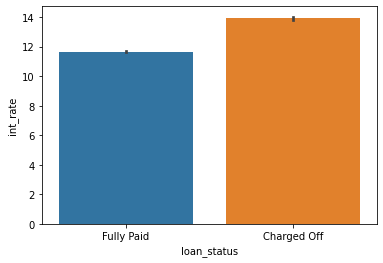

In [42]:
sns.barplot(x='loan_status',y='int_rate',data=loandata_cleaned)

**Observations** :The Interest Rate for Charged Off Loans is Higher

### Interest rate vs grade vs Charged off analysis

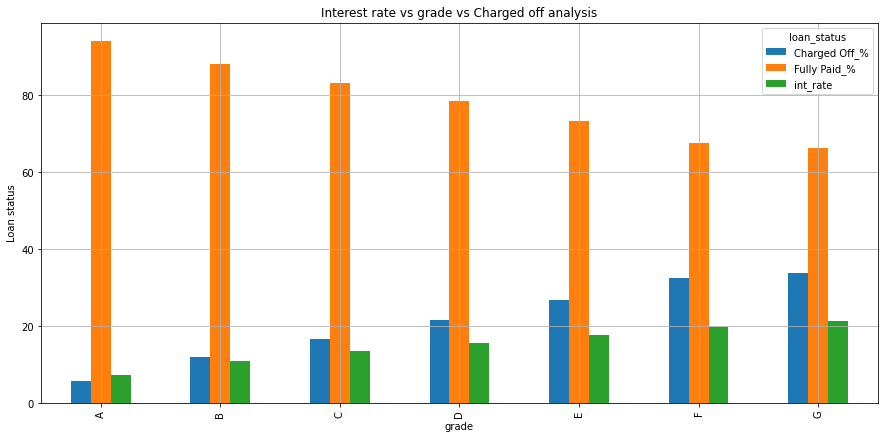

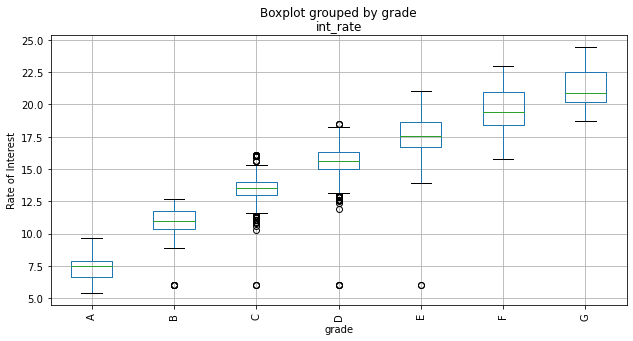

loan_status,Charged Off_%,Fully Paid_%,int_rate
grade,,,
A,5.80,94.20,7.34
B,11.89,88.11,11.04
C,16.75,83.25,13.58
D,21.61,78.39,15.72
E,26.69,73.31,17.67
F,32.52,67.48,19.70
G,33.78,66.22,21.33


In [43]:
int_rate_table = loandata_cleaned.pivot_table(values='int_rate',columns='grade', aggfunc='mean')
int_rate_table = int_rate_table.T
grade_table2['int_rate'] = int_rate_table['int_rate']

ax = grade_table2.plot.bar(figsize=(15, 7),logy=False).grid(True)
plt.ylabel('Loan status')
plt.title("Interest rate vs grade vs Charged off analysis")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
loandata_cleaned.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)
plt.ylabel('Rate of Interest')
# plt.title("title")
plt.show()

grade_table2

#### Observation:

- The Interest Rate for Charged Off Loans is Higher
- With Increasing Grade , the charge Off % and respective Interest Rates are increasing respectively 
- Charged Off % is directly proportional to interest rate.
- Loans given to grades E, F, G needs more scrutiny from Lending Club as charged off % is higher compared to other grades.

### State vs Loan Status (Charged Off) Analysis

In [44]:
## Count of Loans state wise
pop = loandata_cleaned['addr_state'].value_counts().to_frame()
pop.reset_index(level=0, inplace=True)
pop.head(5)

,index,addr_state
0,CA,6685
1,NY,3512
2,FL,2642
3,TX,2559
4,NJ,1735


In [45]:
## State Wise Loans which are charged Off
per = (loandata_cleaned.loc[loandata_cleaned['loan_status']=='Charged Off',['addr_state']])#.value_counts().to_frame()
per = per['addr_state'].value_counts().to_frame()
per.reset_index(level=0, inplace=True)
per.head(5)

,index,addr_state
0,CA,1051
1,FL,463
2,NY,462
3,TX,305
4,NJ,269


In [46]:
## State comparsion based on loans Status of Charged- Off % 
pop['charge_off'] = per['addr_state']
pop['percent'] = round(per['addr_state']/pop['addr_state']*100,2)
pop.head(5)

,index,addr_state,charge_off,percent
0,CA,6685,"1,051.00",15.72
1,NY,3512,463.00,13.18
2,FL,2642,462.00,17.49
3,TX,2559,305.00,11.92
4,NJ,1735,269.00,15.50


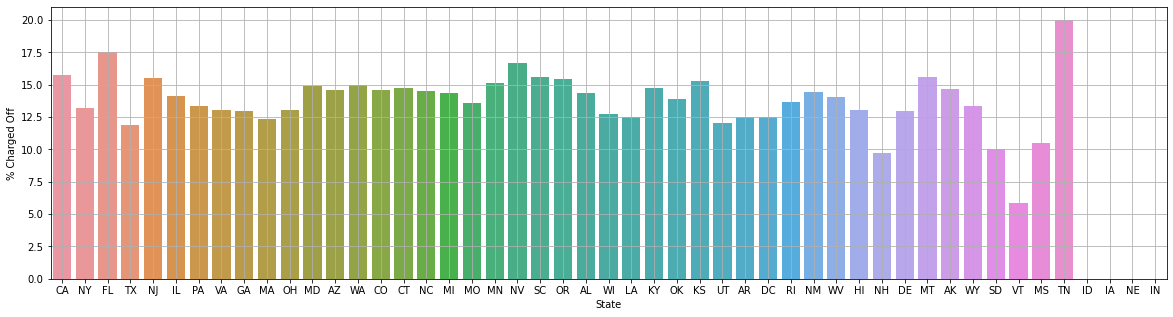

,index,addr_state,charge_off,percent
0,CA,6685,"1,051.00",15.72
1,NY,3512,463.00,13.18
2,FL,2642,462.00,17.49
3,TX,2559,305.00,11.92
4,NJ,1735,269.00,15.50


In [47]:
plt.figure(figsize=(20,5))
ax = sns.barplot(y='percent', x='index', data=pop)
plt.ylabel('% Charged Off')
plt.xlabel('State')
ax.grid(True)
plt.show()

pop.head()

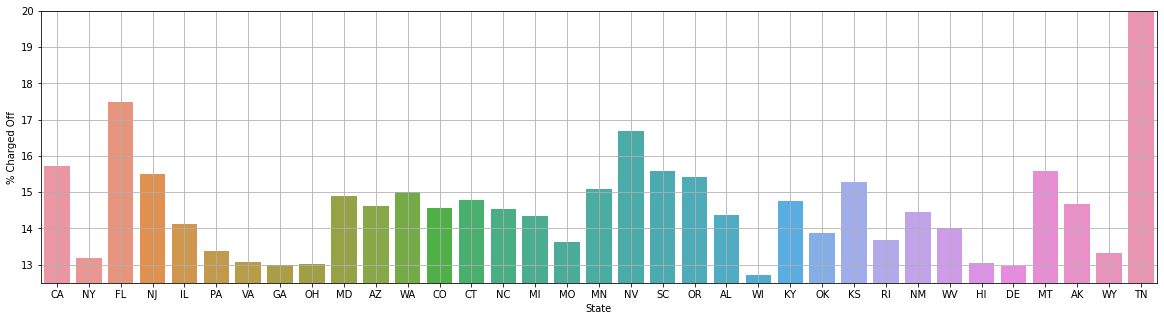

States which have more than 12.5% charged off rate


index,TN,FL,NV,CA,SC,MT,NJ,OR,KS,MN,WA,MD,CT,KY,AK,AZ,CO,NC,NM,AL,MI,IL,WV,OK,RI,MO,PA,WY,NY,VA,HI,OH,GA,DE,WI
addr_state,10.00,"2,642.00",461.00,"6,685.00",443.00,77.00,"1,735.00",415.00,242.00,576.00,760.00,980.00,697.00,305.00,75.00,794.00,721.00,695.00,173.00,411.00,662.00,"1,430.00",164.00,281.00,190.00,639.00,"1,428.00",75.00,"3,512.00","1,307.00",161.00,"1,129.00","1,294.00",108.00,409.00
charge_off,2.00,462.00,77.00,"1,051.00",69.00,12.00,269.00,64.00,37.00,87.00,114.00,146.00,103.00,45.00,11.00,116.00,105.00,101.00,25.00,59.00,95.00,202.00,23.00,39.00,26.00,87.00,191.00,10.00,463.00,171.00,21.00,147.00,168.00,14.00,52.00
percent,20.00,17.49,16.70,15.72,15.58,15.58,15.50,15.42,15.29,15.10,15.00,14.90,14.78,14.75,14.67,14.61,14.56,14.53,14.45,14.36,14.35,14.13,14.02,13.88,13.68,13.62,13.38,13.33,13.18,13.08,13.04,13.02,12.98,12.96,12.71


In [48]:
pop_12 = pop.loc[pop['percent']>12.5]
plt.figure(figsize=(20,5))
ax = sns.barplot(y='percent', x='index', data=pop_12)
plt.ylabel('% Charged Off')
plt.xlabel('State')
plt.ylim(12.5,20)
ax.grid(True)
plt.show()
pop_12.set_index('index',inplace=True)
pop_12.sort_values(by=['percent'],ascending=False,inplace=True)
print('States which have more than 12.5% charged off rate')
pop_12.T

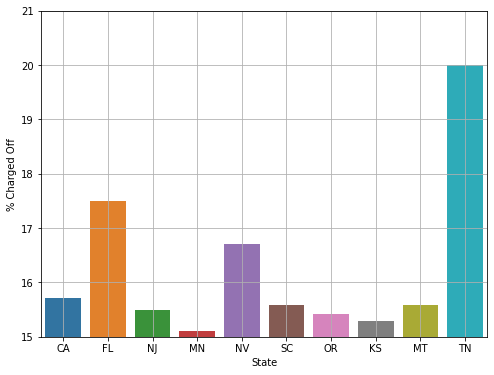

States which have more than 15% charged off rate


index,TN,FL,NV,CA,SC,MT,NJ,OR,KS,MN
addr_state,10.00,"2,642.00",461.00,"6,685.00",443.00,77.00,"1,735.00",415.00,242.00,576.00
charge_off,2.00,462.00,77.00,"1,051.00",69.00,12.00,269.00,64.00,37.00,87.00
percent,20.00,17.49,16.70,15.72,15.58,15.58,15.50,15.42,15.29,15.10


In [49]:
pop_15 = pop.loc[pop['percent']>15]
plt.figure(figsize=(8,6))
ax = sns.barplot(y='percent', x='index', data=pop_15)
ax.grid(True)
plt.ylabel('% Charged Off')
plt.xlabel('State')
plt.ylim(15,21)
plt.show()
pop_15.set_index('index',inplace=True)
pop_15.sort_values(by=['percent'],ascending=False,inplace=True)
print('States which have more than 15% charged off rate')
pop_15.T

In [50]:
pop['percent'].describe()

count   45.00
mean    13.78
std      2.19
min      5.88
25%     12.96
50%     14.02
75%     14.90
max     20.00
Name: percent, dtype: float64

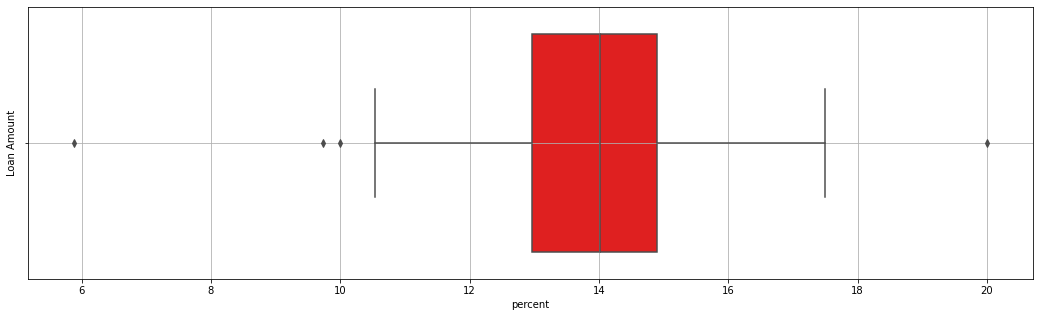

In [51]:
plt.figure(figsize=(18,5))
sns.boxplot( x=pop['percent'] ,color='r').grid(True)
plt.ylabel('Loan Amount')
plt.show()

#### Observation:

- Average charged off rate is 13 - 14%
- 'CA', 'FL', 'NJ', 'MN', 'NV', 'SC', 'OR', 'KS', 'TN' areas have more than 15% default rate.Economy condition may not be good in these areas.

### Bankruptcy rate vs Loan Status (Charged Off) Analysis

In [52]:
bankruptcies_table = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='pub_rec_bankruptcies',
                                            columns='loan_status', 
                                            aggfunc='count')

bankruptcies_table['Total'] = bankruptcies_table['Charged Off'] + bankruptcies_table['Fully Paid'] 
bankruptcies_table['Charged Off_%'] = round(bankruptcies_table['Charged Off']/bankruptcies_table['Total']*100,2)
bankruptcies_table['Fully Paid_%'] = round(bankruptcies_table['Fully Paid']/bankruptcies_table['Total']*100,2)

bankruptcies_table

loan_status,Charged Off,Fully Paid,Total,Charged Off_%,Fully Paid_%
pub_rec_bankruptcies,,,,,
0.00,4944,30368,35312,14.00,86.00
1.00,335,1195,1530,21.90,78.10
2.00,2,3,5,40.00,60.00


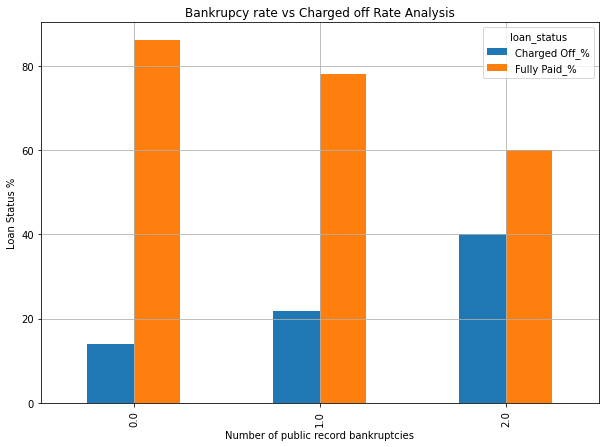

In [53]:
bankruptcies_table.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)
ax = bankruptcies_table.plot.bar(figsize=(10, 7),logy=False).grid(True)
plt.ylabel('Loan Status %')
plt.xlabel('Number of public record bankruptcies')
plt.title('Bankrupcy rate vs Charged off Rate Analysis')
plt.show()

#### Observation:

- 6% difference between 0 and 1 bankerupcies
- Number of bankrupcy has enough impact on default rate



In [54]:
loandata_cleaned['dti']

0       27.65
1        1.00
2        8.72
3       20.00
4       11.20
         ... 
36842    7.51
36843    8.50
36844    5.08
36845   13.50
36846    7.47
Name: dti, Length: 36847, dtype: float64

### DTI rate vs Charged off Rate Analysis

In [55]:
#Devided dti into 6 category
## Creating derived categorical variable from DTI
loandata_cleaned['dti_category'] = loandata_cleaned['dti']//5
dti_table = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='dti_category',
                                            columns='loan_status', 
                                            aggfunc='count')


dti_table['Total'] = dti_table['Charged Off'] + dti_table['Fully Paid'] 
dti_table['Charged Off_%'] = round(dti_table['Charged Off']/dti_table['Total']*100,2)
dti_table.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)
dti_table.reset_index(level=0, inplace=True)

dti_table

loan_status,dti_category,Charged Off_%
0,0.00,12.34
1,1.00,12.48
2,2.00,14.26
3,3.00,15.55
4,4.00,16.57
5,5.00,13.21


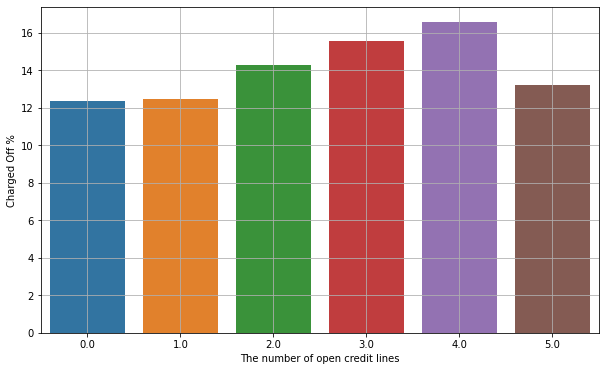

In [56]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y='Charged Off_%', x='dti_category', data=dti_table)
ax.grid(True)
plt.xlabel('The number of open credit lines')
plt.ylabel('Charged Off %')
plt.show()

#### Observation:

- Charged off rate is increasing when rate of DTI is increasing

### Verification_status rate vs Charged off Rate Analysis

In [57]:
verification_table = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='verification_status',
                                            columns='loan_status', 
                                            aggfunc='count')

verification_table['Total'] = verification_table['Charged Off'] + verification_table['Fully Paid'] 
verification_table['Charged Off_%'] = round(verification_table['Charged Off']/verification_table['Total']*100,2)
verification_table['Fully Paid_%'] = round(verification_table['Fully Paid']/verification_table['Total']*100,2)

verification_table

loan_status,Charged Off,Fully Paid,Total,Charged Off_%,Fully Paid_%
verification_status,,,,,
Not Verified,1931,13651,15582,12.39,87.61
Source Verified,1396,8098,9494,14.70,85.30
Verified,1954,9817,11771,16.60,83.40


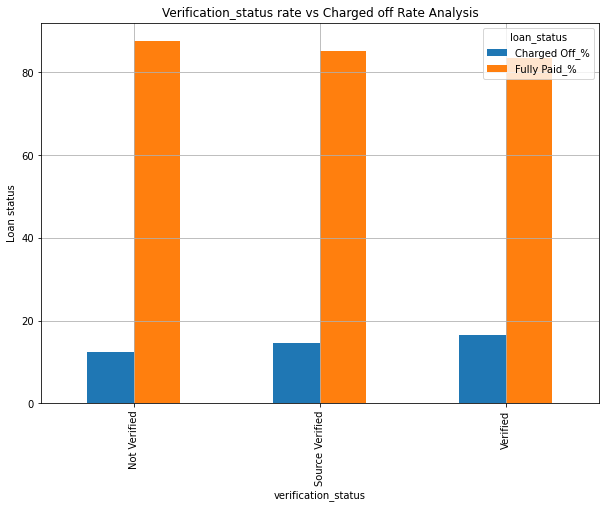

In [58]:
verification_table.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)

ax = verification_table.plot.bar(figsize=(10, 7),logy=False).grid(True)
plt.ylabel('Loan status')
plt.title("Verification_status rate vs Charged off Rate Analysis")
plt.show()

#### Observation:

- We can see nagative correlation here.



### Number of open credit line vs Charged off Rate Analysis

In [59]:
open_acc_table = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='open_acc',
                                            columns='loan_status', 
                                            aggfunc='count')

open_acc_table['Total'] = open_acc_table['Charged Off'] + open_acc_table['Fully Paid'] 
open_acc_table['Charged Off_%'] = round(open_acc_table['Charged Off']/open_acc_table['Total']*100,2)

# open_acc_table.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)
open_acc_table.reset_index(level=0, inplace=True)

open_acc_table.head()

loan_status,open_acc,Charged Off,Fully Paid,Total,Charged Off_%
0,2,114.00,413.00,527.00,21.63
1,3,233.00,"1,145.00","1,378.00",16.91
2,4,335.00,"1,832.00","2,167.00",15.46
3,5,387.00,"2,551.00","2,938.00",13.17
4,6,512.00,"3,163.00","3,675.00",13.93


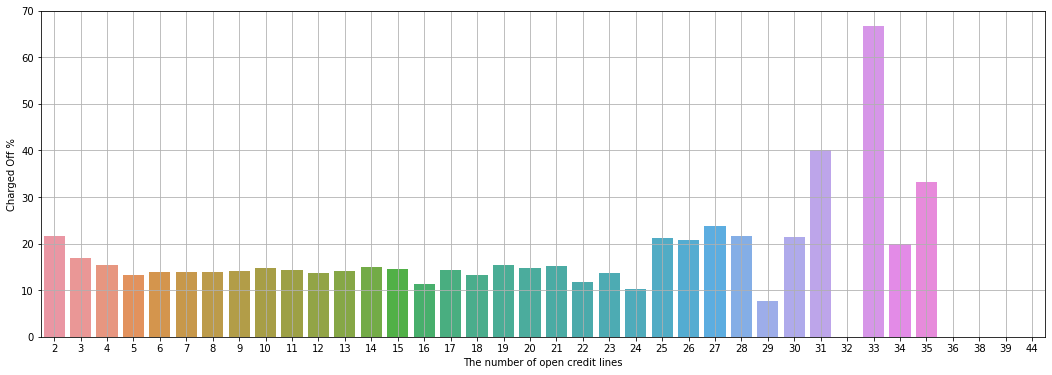

In [60]:
plt.figure(figsize=(18,6))
ax = sns.barplot(y='Charged Off_%', x='open_acc', data=open_acc_table)
ax.grid(True)
plt.xlabel('The number of open credit lines')
plt.ylabel('Charged Off %')
plt.show()

#### Observation:

- More than 25 open credit lines increases the charged off rate



### Borrower employeement duration vs Charged off Rate Analysis

In [61]:
emp_lenth_table = loandata_cleaned.pivot_table(values='loan_amnt',
                                            index='emp_length',
                                            columns='loan_status', 
                                            aggfunc='count')

emp_lenth_table.reset_index(level=0, inplace=True)

emp_lenth_table['Total'] = emp_lenth_table['Charged Off'] + emp_lenth_table['Fully Paid'] 
emp_lenth_table['Charged Off_%'] = round(emp_lenth_table['Charged Off']/emp_lenth_table['Total']*100,2)
emp_lenth_table['Fully Paid_%'] = round(emp_lenth_table['Fully Paid']/emp_lenth_table['Total']*100,2)

emp_lenth_table

loan_status,emp_length,Charged Off,Fully Paid,Total,Charged Off_%,Fully Paid_%
0,1,1054,6364,7418,14.21,85.79
1,2,556,3651,4207,13.22,86.78
2,3,549,3402,3951,13.90,86.10
3,4,450,2847,3297,13.65,86.35
4,5,454,2707,3161,14.36,85.64
5,6,301,1835,2136,14.09,85.91
6,7,258,1431,1689,15.28,84.72
7,8,200,1210,1410,14.18,85.82
8,9,156,1053,1209,12.90,87.10
9,10,1303,7066,8369,15.57,84.43


In [62]:
emp_lenth_table.drop(['Charged Off','Fully Paid','Total'], axis=1,inplace=True)

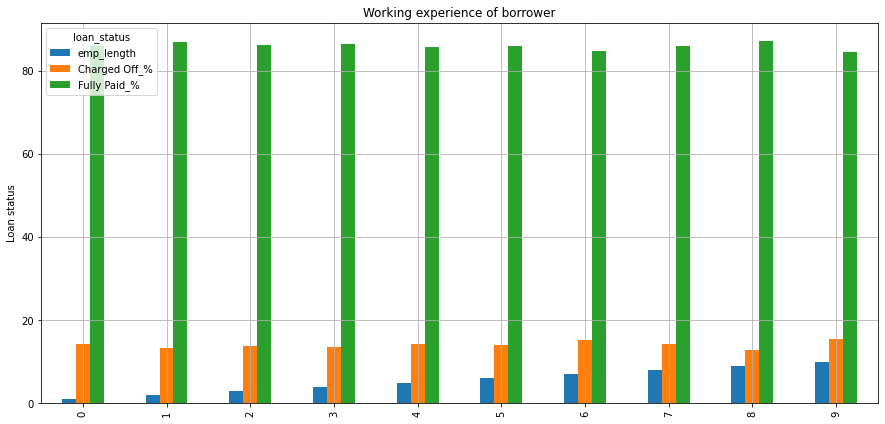

In [63]:
ax = emp_lenth_table.plot.bar(figsize=(15, 7),logy=False).grid(True)
title = 'Working experience of borrower'
plt.ylabel('Loan status')
plt.title(title)
plt.show()

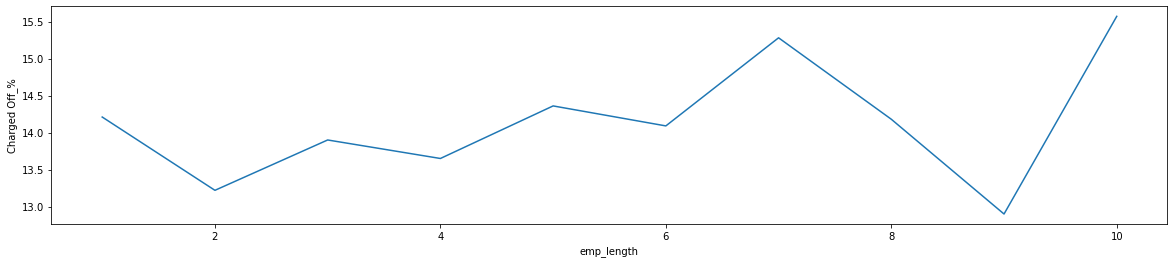

loan_status,emp_length,Charged Off_%,Fully Paid_%
0,1,14.21,85.79
1,2,13.22,86.78
2,3,13.90,86.10
3,4,13.65,86.35
4,5,14.36,85.64
5,6,14.09,85.91
6,7,15.28,84.72
7,8,14.18,85.82
8,9,12.90,87.10
9,10,15.57,84.43


In [64]:
plt.figure(figsize=(20,4))
sns.lineplot(data=emp_lenth_table, y='Charged Off_%', x='emp_length')
plt.show()

emp_lenth_table

#### Observation:

- We can see here nagative correlation .
- As working experince increases charged off rate is also increasing



### Funded amount vs borrower anual income vs Charged off Rate Analysis

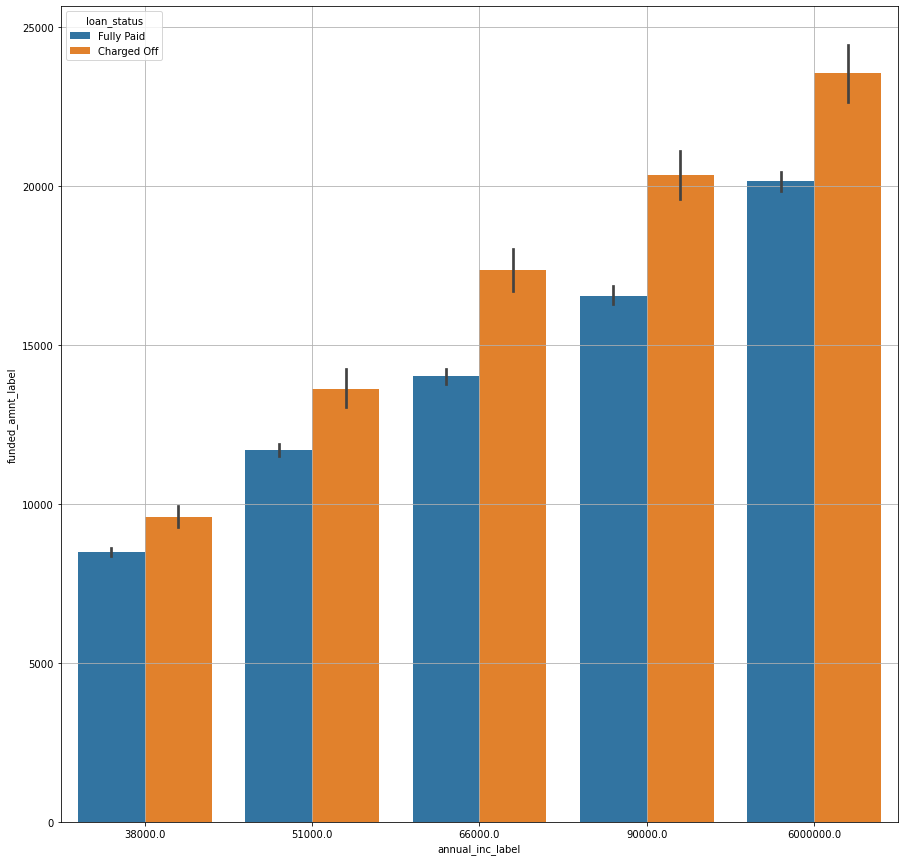

In [65]:
loandata_cleaned['funded_amnt_label']= pd.IntervalIndex(pd.qcut(loandata_cleaned['funded_amnt'], 
                                                                q=[0, .2, .4, .6, .8, 1])).right
loandata_cleaned['annual_inc_label']= pd.IntervalIndex(pd.qcut(loandata_cleaned['annual_inc'], 
                                                               q=[0, .2, .4, .6, .8, 1])).right

plt.figure(figsize=(15,15))
sns.barplot(y='funded_amnt_label',x='annual_inc_label',hue='loan_status',data=loandata_cleaned).grid(True)
plt.show()


#### Observation:

- If Annual income is between 4k to 38k , Loan amount greater than approx 8k has higher chances of "Charged-Off"
- If Annual income is between 38k to 51k , Loan amount greater than approx 12k has higher chances of "Charged-Off"
- If Annual income is between 51k to 66k, Loan amount greater than approx 13k has higher chances of "Charged-Off"
- If Annual income is between 66k to 90k, Loan amount greater than approx 16k has higher chances of "Charged-Off"
- If Annual income is greater than 90k , Loan amount greater than approx 20k has higher chances of "Charged-Off"


## Verify the clean dataset


In [66]:
loandata_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,state_zip_code,dti_category,funded_amnt_label,annual_inc_label
0,1077501,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,12,2011,AZ860,5.00,"5,000.00","38,000.00"
1,1077430,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,12,2011,GA309,0.00,"5,000.00","38,000.00"
2,1077175,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,12,2011,IL606,1.00,"5,000.00","38,000.00"
3,1076863,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,12,2011,CA917,4.00,"11,000.00","51,000.00"
4,1075269,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,12,2011,AZ852,2.00,"5,000.00","38,000.00"


## Conclusion

#### There are some driving variables behind loan default.

total_pymnt,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,grade,home_ownership,
annual_inc,loan_status,purpose,addr_state,dti,open_acc,total_pymnt_inv,pub_rec_bankruptcies

#### Few new metrix we have created to find out these driving variables.
